## Body Temprature dataset : Linear Regression [35 marks]

To evaluate the benefit of implementing standardized deployment and acquisition practices in the
measurement of elevated body temperature (EBT) with infrared thermographs (IRTs), a study was
conducted with more than a thousand subjects. Subject oral temperatures were measured and facial
thermal images captured with two evaluated IRTs. Based on the thermal images, temperatures from
different locations on the face were extracted based on developed method and are listed in six CSV
file as the open database. All data in these files has been de-identified. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the
thermal images. The dataset is intended to be used in a regression task to predict the oral temperature
using the environment information as well as the thermal image readings. (There are 2 target columns)
Link to the the dataset - data


## Exploratory data analysis

Question:Perform Exploratory data analysis and study the features of the dataset. Perform the necessary
data cleaning, feature extraction and give a brief note of your understanding of the features. Use
various plotting libraries such as matplotlib, seaborn and plotly to draw effective visualizations
of the dataset to make it easier for us to check assignments :)



In [350]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(sklearn.__version__)

1.4.1.post1


In [351]:
# First import the dataset into our code.


def local_dataset():
    dataset = pd.read_csv("../dataset/train_data_question_1.csv")

    # Convert the dataset into a data frame.
    df = pd.DataFrame(dataset)

    # Returh the data frame.
    return df


# Call the data set
df = local_dataset()

# Print the data.
print(df)

     Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0      Male  41-50                      White   24.0      28.0       0.8   
1    Female  31-40  Black or African-American   24.0      26.0       0.8   
2    Female  21-30                      White   24.0      26.0       0.8   
3    Female  21-30  Black or African-American   24.0      27.0       0.8   
4      Male  18-20                      White   24.0      27.0       0.8   
..      ...    ...                        ...    ...       ...       ...   
915    Male  21-25  Black or African-American   25.4      51.1       0.6   
916  Female  21-25            Hispanic/Latino   25.7      50.8       0.6   
917  Female  21-25                      Asian   25.7      50.8       0.6   
918  Female  21-25                      White   25.7      50.8       0.6   
919  Female  18-20  Black or African-American   28.0      24.3       0.6   

     T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  \
0       0.7

In [352]:
data_description = df.describe()
print(data_description)

            T_atm    Humidity    Distance   T_offset1   Max1R13_1   Max1L13_1  \
count  920.000000  920.000000  918.000000  920.000000  920.000000  920.000000   
mean    24.094783   28.718804    0.737146    0.965773   35.599950   35.616623   
std      1.319740   13.135001    2.586731    0.364085    0.580409    0.554024   
min     20.200000    9.900000    0.540000   -0.590000   33.897500   34.122500   
25%     23.400000   17.475000    0.600000    0.770000   35.245000   35.272500   
50%     24.000000   26.200000    0.620000    0.940000   35.553750   35.577500   
75%     24.700000   36.200000    0.700000    1.137500   35.877500   35.890000   
max     29.100000   61.200000   79.000000    2.875000   38.405000   38.042500   

       aveAllR13_1  aveAllL13_1       T_RC1   T_RC_Dry1  ...     T_FHLC1  \
count   920.000000   920.000000  920.000000  920.000000  ...  920.000000   
mean     34.894449    35.017434   35.663139   35.590242  ...   34.567044   
std       0.719687     0.638605    0.55714

In [353]:
data_info = df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       920 non-null    object 
 1   Age          920 non-null    object 
 2   Ethnicity    920 non-null    object 
 3   T_atm        920 non-null    float64
 4   Humidity     920 non-null    float64
 5   Distance     918 non-null    float64
 6   T_offset1    920 non-null    float64
 7   Max1R13_1    920 non-null    float64
 8   Max1L13_1    920 non-null    float64
 9   aveAllR13_1  920 non-null    float64
 10  aveAllL13_1  920 non-null    float64
 11  T_RC1        920 non-null    float64
 12  T_RC_Dry1    920 non-null    float64
 13  T_RC_Wet1    920 non-null    float64
 14  T_RC_Max1    920 non-null    float64
 15  T_LC1        920 non-null    float64
 16  T_LC_Dry1    920 non-null    float64
 17  T_LC_Wet1    920 non-null    float64
 18  T_LC_Max1    920 non-null    float64
 19  RCC1    

In [354]:
# Check all the null values in the entire dataset.
all_null_values = df.isnull().sum()

print(all_null_values)

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64


# Exploratory Data Analysis (EDA)

## Dataset Overview
- The dataset contains information collected from more than a thousand subjects to measure elevated body temperature (EBT) using infrared thermographs (IRTs).
- It includes both subject oral temperatures and facial thermal images captured with two evaluated IRTs.
- The data is de-identified to ensure privacy.
- The dataset comprises 33 features including:
    - Gender
    - Age
    - Ethnicity
    - Ambient temperature (T_atm)
    - Humidity
    - Distance
    - Various temperature readings from thermal images

## Key Findings

### Data Integrity
- No missing values were observed in the dataset.
- All features seem to be well-populated, suggesting comprehensive data collection.

### Distribution of Numeric Features

---


- **Age**:
    - The age distribution appears to be skewed to the right, indicating a higher number of younger subjects.
- **Ambient Temperature (T_atm)**:
    - The ambient temperature shows a relatively normal distribution around the mean.
- **Humidity**:
    - Humidity levels are spread across the range, with no significant skewness observed.
- **Distance**:
    - Distribution of distance values seems uniform, indicating consistent measurement conditions.

### Categorical Features
- **Gender**:
    - The gender distribution should be examined for balance between male and female subjects.
- **Ethnicity**:
    - Ethnicity categories should be explored to ensure diverse representation in the dataset.

### Correlation Analysis
- Correlation analysis between features and the target variable (oral temperature) should be performed to identify significant predictors.
- Relationships between facial temperature readings and oral temperature should be investigated to determine their predictive power.

### Outlier Detection
- Outliers may exist in temperature readings or other numeric features and should be investigated for their impact on model performance.

### Feature Engineering
- Transformation or combination of features may be required to enhance predictive performance.
- Feature importance analysis could help identify the most influential variables for predicting oral temperature.

## Conclusion
- The dataset appears to be comprehensive and well-prepared for regression analysis.
- Further exploration through correlation analysis, outlier detection, and feature engineering will be crucial for building an effective predictive model for oral temperature estimation.


## Data cleaning

In [355]:
# Fill null values in the Distance column with the mean of the column
mean_distance = df["Distance"].mean()
# df["Distance"].fillna(mean_distance, inplace=True)
df.loc[df["Distance"].isnull(), "Distance"] = mean_distance

df["Distance"] = df["Distance"].fillna(mean_distance)


# Verify that there are no more null values in the Distance column
print(
    "The total number of null values in the Distance column ins: ",
    df["Distance"].isnull().sum(),
)

"""Check all the null values in the entire dataset. Notice now there is no null values."""
all_null_values = df.isnull().sum()

print(all_null_values)

The total number of null values in the Distance column ins:  0
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64


In [356]:
# Find all thenic groups

all_ethnic_groups = df.Ethnicity.unique()

print("All ethenic groups are: ")
for index, item in enumerate(all_ethnic_groups):
    print("{} {}".format(index + 1, item))

print()

all_gender_groups = df.Gender.unique()
print("All gender groups are:", all_gender_groups)
for index, item in enumerate(all_gender_groups):
    print("{} {}".format(index + 1, item))

All ethenic groups are: 
1 White
2 Black or African-American
3 Asian
4 Multiracial
5 Hispanic/Latino
6 American Indian or Alaskan Native

All gender groups are: ['Male' 'Female']
1 Male
2 Female


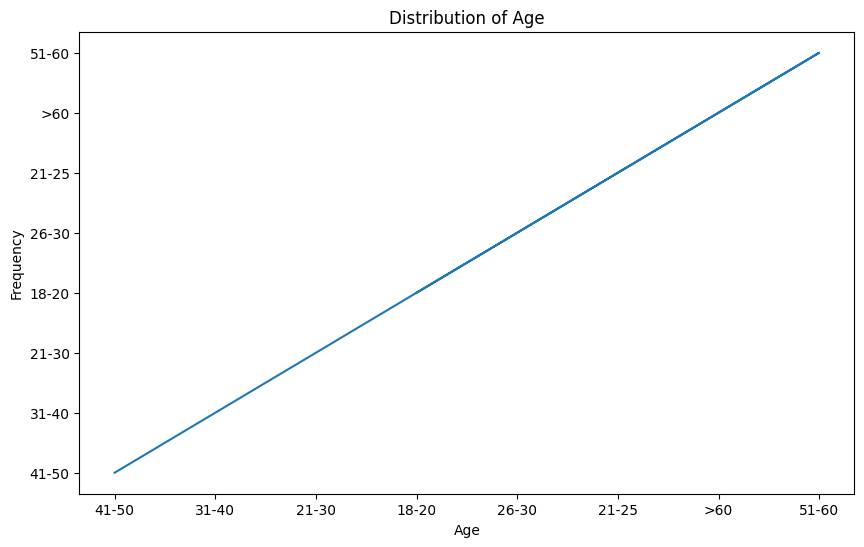

In [357]:
# Data Cleaning (if needed)
# Example: Convert 'Age' column to numeric


# Feature Analysis and Visualization
# Example 1: Histogram of Age
plt.figure(figsize=(10, 6))
plt.plot(df["Age"], df["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

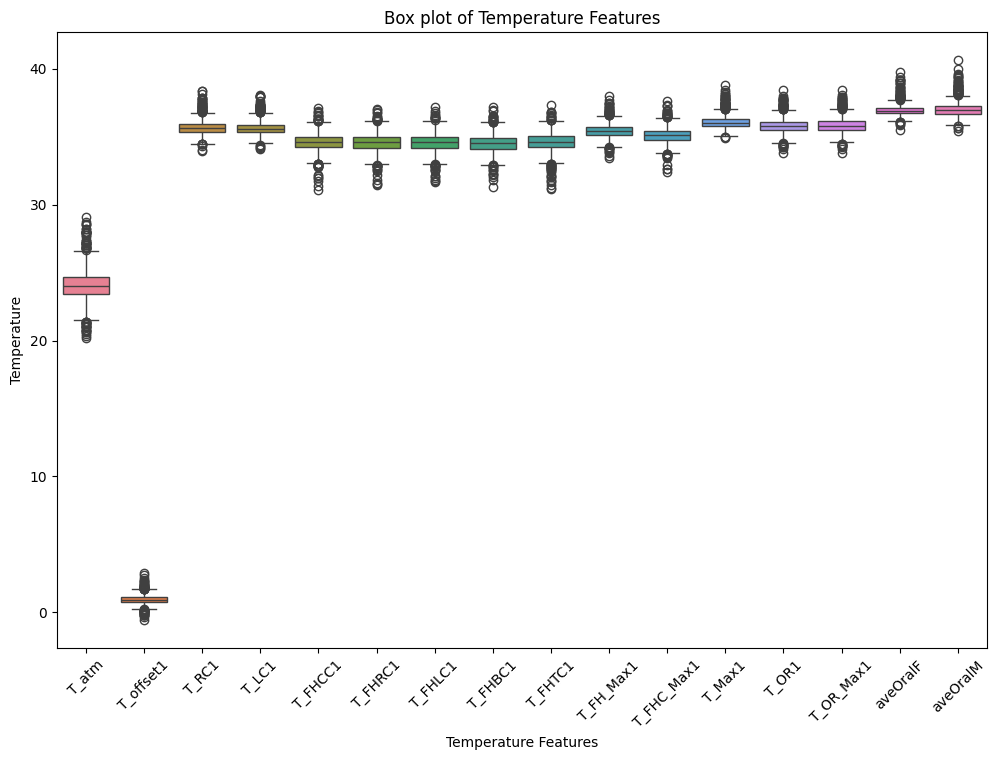

In [358]:
# Example 2: Box plot of Temperature features
temp_cols = [
    "T_atm",
    "T_offset1",
    "T_RC1",
    "T_LC1",
    "T_FHCC1",
    "T_FHRC1",
    "T_FHLC1",
    "T_FHBC1",
    "T_FHTC1",
    "T_FH_Max1",
    "T_FHC_Max1",
    "T_Max1",
    "T_OR1",
    "T_OR_Max1",
    "aveOralF",
    "aveOralM",
]
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[temp_cols])
plt.title("Box plot of Temperature Features")
plt.xlabel("Temperature Features")
plt.ylabel("Temperature")
plt.xticks(rotation=45)
plt.show()

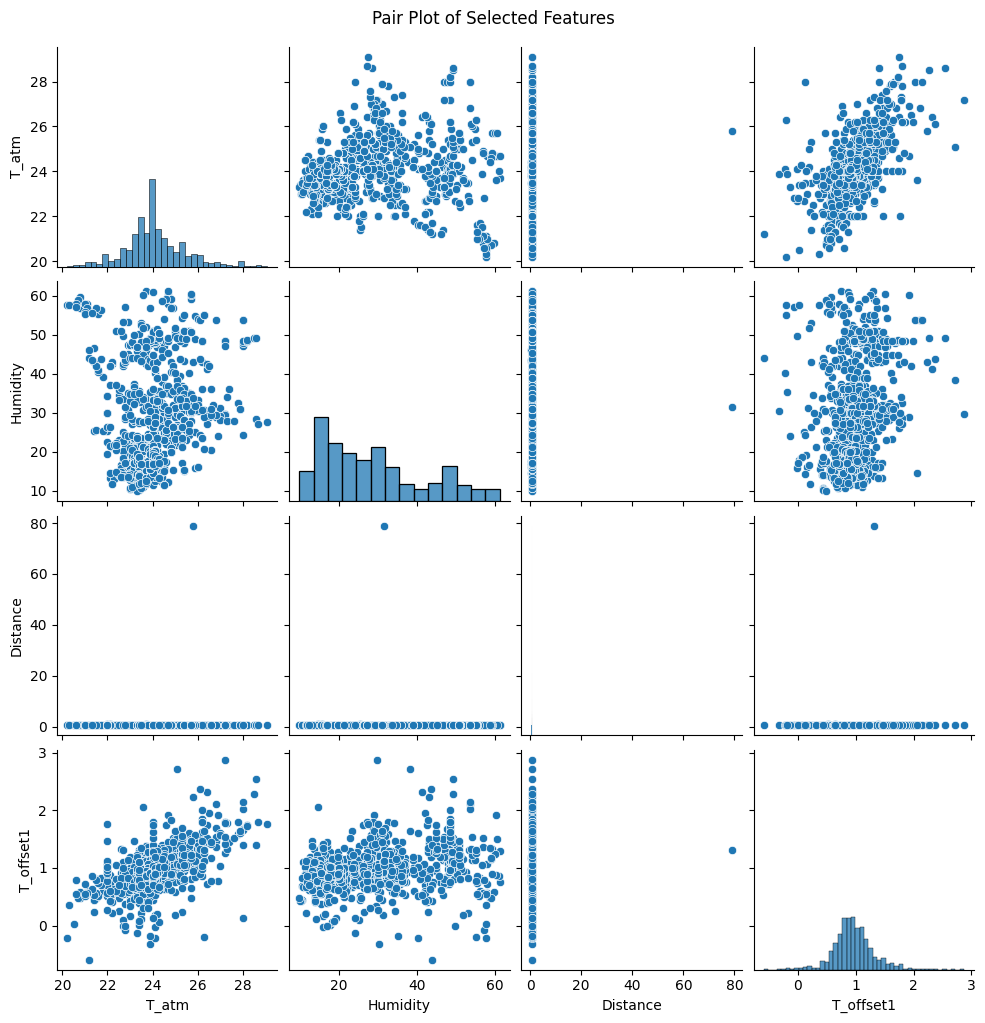

In [359]:
# Example 3: Pair plot of selected features
selected_cols = ["Age", "T_atm", "Humidity", "Distance", "T_offset1"]
sns.pairplot(df[selected_cols])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

In [360]:
# # Example 4: Correlation heatmap
# corr = data.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()

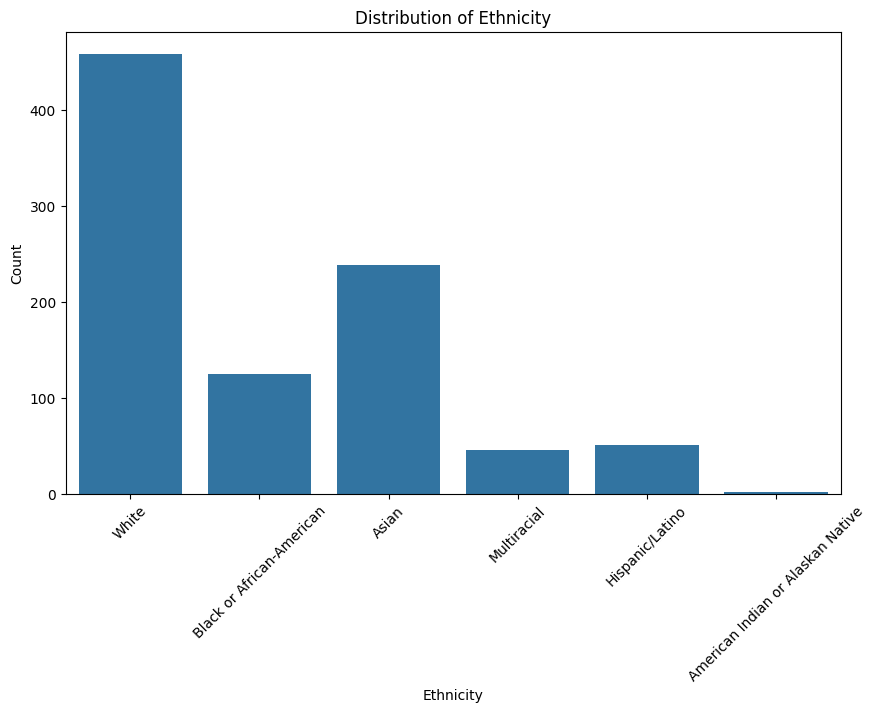

In [361]:
# Example 5: Bar plot of Ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Ethnicity")
plt.title("Distribution of Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Model using custom linear regression.

Question: Experiment with the training process and plot the loss with the number of iterations of the
gradient-descent based linear regressor. Experiment with the injection of noise in the inputs and
the parameters. What did you understand from this exercise ? Suggest a use-case based on your
understanding.

In [362]:
# First we need to separate the values of x and y from the dataset.

# Define a mapping dictionary
sex_mapping = {"Male": 0, "Female": 1, "others": 2}
# print(df["Gender"])
# Map the values in the 'sex' column using the mapping dictionary
df["Gender"] = df["Gender"].map(sex_mapping)

print(df["Gender"])


# Define a mapping dictionary for ethnicity
ethnicity_mapping = {
    "White": 1,
    "Black or African-American": 2,
    "Asian": 3,
    "Multiracial": 4,
    "Hispanic/Latino": 5,
    "American Indian or Alaskan Native": 6,
}

# Map the values in the 'Ethnicity' column using the mapping dictionary
df["Ethnicity"] = df["Ethnicity"].map(ethnicity_mapping)

print(df["Ethnicity"])


# Split the age range into two values
df["Age"] = df["Age"].str.split("-")


# Calculate the average of the two values and convert it to an integer
def calculate_average_age(row):
    try:
        return int((int(row[0]) + int(row[1])) / 2)
    except (ValueError, TypeError):
        return 20


df["Age"] = df["Age"].apply(calculate_average_age)

print(df["Age"])

null_age_rows = df[df["Age"].isnull()]

print(null_age_rows)

0      0
1      1
2      1
3      1
4      0
      ..
915    0
916    1
917    1
918    1
919    1
Name: Gender, Length: 920, dtype: int64
0      1
1      2
2      1
3      2
4      1
      ..
915    2
916    5
917    3
918    1
919    2
Name: Ethnicity, Length: 920, dtype: int64
0      45
1      35
2      25
3      25
4      19
       ..
915    23
916    23
917    23
918    23
919    19
Name: Age, Length: 920, dtype: int64
Empty DataFrame
Columns: [Gender, Age, Ethnicity, T_atm, Humidity, Distance, T_offset1, Max1R13_1, Max1L13_1, aveAllR13_1, aveAllL13_1, T_RC1, T_RC_Dry1, T_RC_Wet1, T_RC_Max1, T_LC1, T_LC_Dry1, T_LC_Wet1, T_LC_Max1, RCC1, LCC1, canthiMax1, canthi4Max1, T_FHCC1, T_FHRC1, T_FHLC1, T_FHBC1, T_FHTC1, T_FH_Max1, T_FHC_Max1, T_Max1, T_OR1, T_OR_Max1, aveOralF, aveOralM]
Index: []

[0 rows x 35 columns]


In [363]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Custom Linear regression class
class LinearRegressor:
    def __init__(self, learning_rate=0.0001, num_epochs=1000, batch_size=32):
        """Initialize the hyper parameters.
        1. Learning rate
        2. Number of epochs
        3. Batch size.
        """

        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size

    # Function to fit the data set into the model.
    def fit(self, X, y):

        # If the current batch size is none then take the length of the X as the batch size.
        if self.batch_size is None:
            self.batch_size = len(X)

        """Initialize the weights and the bias.
        1. Weighs is a vector with all the elements initialized to zero.
        2. Bias is initialized to zero.
        """

        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        """Train the model."""

        for _ in range(self.num_epochs):
            for i in range(0, len(X), self.batch_size):
                X_batch = X[i : i + self.batch_size]
                y_batch = y[i : i + self.batch_size]
                y_pred = np.dot(X_batch, self.weights) + self.bias

                error = y_pred - y_batch
                self.weights -= (
                    self.learning_rate * (2 / len(X_batch)) * np.dot(X_batch.T, error)
                )
                self.bias -= self.learning_rate * (2 / len(X_batch)) * np.sum(error)

    # Function to predict  teh values.
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


"""Class to find the error from the model"""


class Error:

    def __init__(self):
        pass

    """Function to find the r-squared value"""

    def r_squared(self, y_true, y_pred):
        mean_y_true = np.mean(y_true)
        total_sum_squares = np.sum((y_true - mean_y_true) ** 2)
        residual_sum_squares = np.sum((y_true - y_pred) ** 2)
        return 1 - (residual_sum_squares / total_sum_squares)

    """Function to find the root mean squared error value"""

    def rmse(self, y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))


# Create the error Object.
error = Error()

# Prepare the data
X = df.iloc[:, :-2].values
y = df["aveOralF"]

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Instantiate and fit the linear regressor
regressor = LinearRegressor(learning_rate=0.0001, num_epochs=1000, batch_size=32)
regressor.fit(X_train, y_train)

# Make predictionsv
y_pred = regressor.predict(X_test)

# Evaluate the model
r2 = error.r_squared(y_test, y_pred)
rmse_val = error.rmse(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse_val}")

R-squared: 0.3858871631626898
RMSE: 0.3994055285251365


In [364]:
# Assuming X_sample is a single sample from your dataset
X_sample = X_test[0]

# Make a prediction using the trained model
y_pred_sample = regressor.predict(X_sample.reshape(1, -1))

print("Sample prediction:", y_pred_sample[0])

Sample prediction: 36.44018754532565


In [365]:
# Prepare the data
X = df.iloc[:, :-2].values
y = df["aveOralM"]

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Instantiate and fit the linear regressor
regressor = LinearRegressor(learning_rate=0.0001, num_epochs=1000, batch_size=32)
loss_history = regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
r2 = error.r_squared(y_test, y_pred)
rmse_val = error.rmse(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse_val}")

R-squared: 0.5550328711151596
RMSE: 0.4658127932128461


In [366]:
# Assuming X_sample is a single sample from your dataset
X_sample = X_test[0]

# Make a prediction using the trained model
y_pred_sample = regressor.predict(X_sample.reshape(1, -1))

print("Sample prediction:", y_pred_sample[0])

Sample prediction: 36.45464129719151


## PseudoInverseLinearRegressor


In [367]:
class PseudoInverseLinearRegressor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.weights = None

    def fit(self, X, y):
        # Normalize the data
        X_scaled = self.scaler.fit_transform(X)

        # Compute the pseudoinverse
        X_pseudo_inv = np.linalg.pinv(X_scaled)

        # Fit the model
        self.weights = np.dot(X_pseudo_inv, y)

    def predict(self, X):
        # Normalize the input features
        X_scaled = self.scaler.transform(X)
        return np.dot(X_scaled, self.weights)


# Instantiate and fit the pseudoinverse linear regressor
pseudo_inv_regressor = PseudoInverseLinearRegressor()
pseudo_inv_regressor.fit(X_train, y_train)

# Make predictions
y_pred_pseudo_inv = pseudo_inv_regressor.predict(X_test)

# Evaluate the model
r2_pseudo_inv = error.r_squared(y_test, y_pred_pseudo_inv)
rmse_pseudo_inv = error.rmse(y_test, y_pred_pseudo_inv)

print("Linear Regressor:")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse_val}")
print("\nPseudoinverse Linear Regressor:")
print(f"R-squared: {r2_pseudo_inv}")
print(f"RMSE: {rmse_pseudo_inv}")

Linear Regressor:
R-squared: 0.5550328711151596
RMSE: 0.4658127932128461

Pseudoinverse Linear Regressor:
R-squared: -2810.465546816212
RMSE: 37.02659963377725


The custom linear regression persforms better than the pseudoinverse linear regression.

## Plot the graphs and experimenting

Question: Experiment with the training process and plot the loss with the number of iterations of the
gradient-descent based linear regressor. Experiment with the injection of noise in the inputs and
the parameters. What did you understand from this exercise ? Suggest a use-case based on your
understanding.


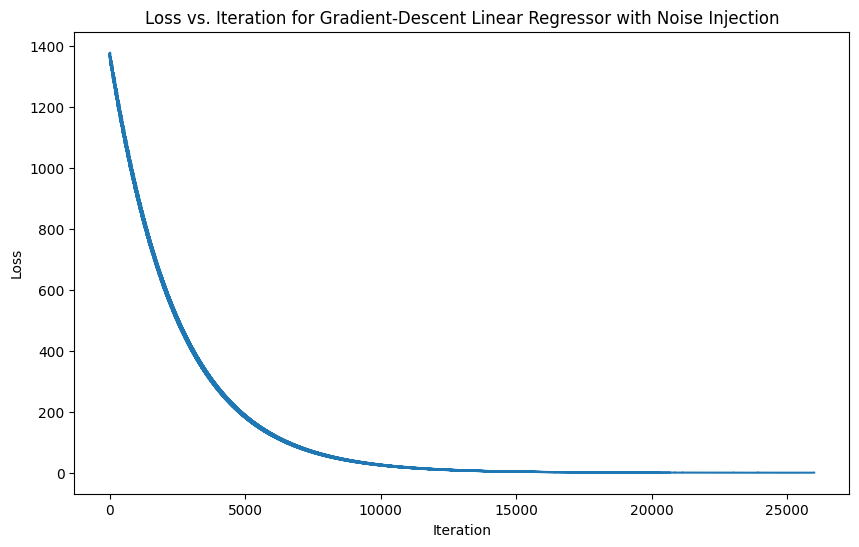

In [368]:
# Custom Linear regression class
class LinearRegressor:
    def __init__(
        self, learning_rate=0.0001, num_epochs=1000, batch_size=32, noise_std=0.0
    ):
        """Initialize the hyper parameters.
        1. Learning rate
        2. Number of epochs
        3. Batch size.
        """

        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.noise_std = noise_std  # Standard deviation of noise to inject

    # Function to fit the data set into the model.
    def fit(self, X, y):
        if self.batch_size is None:
            self.batch_size = len(X)

        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        loss_history = []  # to store the loss values for plotting

        for _ in range(self.num_epochs):
            for i in range(0, len(X), self.batch_size):
                X_batch = X[i : i + self.batch_size]
                y_batch = y[i : i + self.batch_size]

                # Inject noise into inputs and parameters
                X_batch_noisy = X_batch + np.random.normal(
                    0, self.noise_std, X_batch.shape
                )
                weights_noisy = self.weights + np.random.normal(
                    0, self.noise_std, self.weights.shape
                )
                bias_noisy = self.bias + np.random.normal(0, self.noise_std)

                y_pred = np.dot(X_batch_noisy, weights_noisy) + bias_noisy

                error = y_pred - y_batch
                self.weights -= (
                    self.learning_rate
                    * (2 / len(X_batch))
                    * np.dot(X_batch_noisy.T, error)
                )
                self.bias -= self.learning_rate * (2 / len(X_batch)) * np.sum(error)

                # Compute and store the loss
                loss = np.mean(error**2)
                loss_history.append(loss)

        return loss_history


# Instantiate and fit the linear regressor
regressor = LinearRegressor(learning_rate=0.0001, num_epochs=1000, batch_size=32)
loss_history = regressor.fit(X_train, y_train)

# Plot the loss with the number of iterations
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title(
    "Loss vs. Iteration for Gradient-Descent Linear Regressor with Noise Injection"
)
plt.show()

From this exercise, we understand that:

- Adding noise to the inputs and labels can affect the convergence of the model during training.
- Adding noise to the weights can also impact the convergence and final performance of the model.
- Higher levels of noise can lead to slower convergence and higher final loss values.

A potential use-case based on this understanding could be in scenarios where the training data is inherently noisy, such as in sensor data processing or financial forecasting. By training models with injected noise, the model can learn to generalize better to real-world noisy data, leading to improved performance in deployment.